In [100]:
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16.8,6.72
import math
import sklearn
from sklearn.preprocessing import MinMaxScaler
import sklearn
from scipy.stats import zscore
import somoclu
import seaborn
#import Orange
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import inconsistent
from Orange.projection.pca import PCA
from scipy.cluster.hierarchy import fcluster
from sklearn.utils import shuffle
from sklearn.neighbors.kde import KernelDensity
from time import time
import sompy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy

In [28]:
filedata= 'D:/Development/mestrado/uma/dataset/callsinfo.csv'
df = pd.read_csv(filedata, engine='python', sep=';')
df.head()

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance,FaultCause
0,0.853,0.609,-66.728,-20.042,10.836,148.692,0.713,1
1,0.909,0.800,-61.816,-19.071,15.236,205.652,0.601,1
2,0.963,0.818,-61.778,-18.862,16.395,251.339,0.587,1
3,0.940,0.889,-63.843,-19.436,14.816,232.213,0.586,1
4,0.952,0.900,-61.796,-19.403,14.402,191.574,0.629,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000116E5278>]], dtype=object)

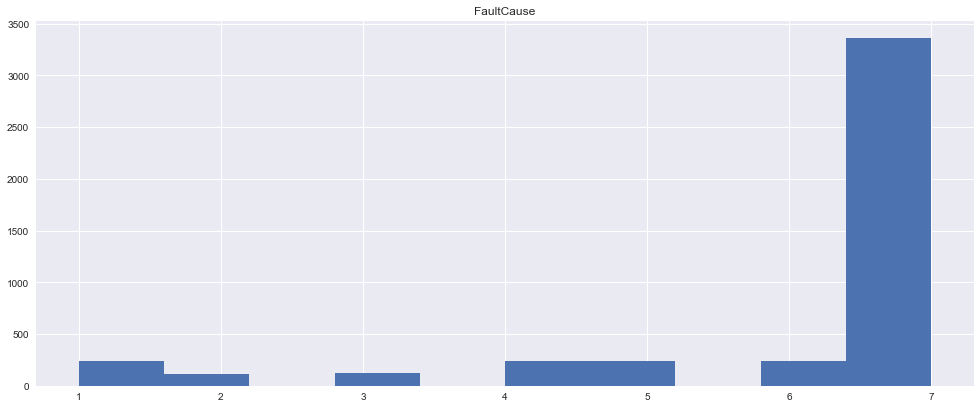

In [143]:
df.hist(column='FaultCause',bins=10)

In [29]:
sorted_df = df.sort_values('FaultCause')
base = shuffle(sorted_df[0:len(sorted_df)-3000])

In [30]:
t1 = base[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].apply(zscore)
t1['FaultCause'] = base['FaultCause'].values
#t1.to_csv(path_or_buf='D:/Development/mestrado/uma/dataset/base_norm_callsinfo.csv', sep=',')

In [156]:
# create design matrix X and target vector y
X = np.array(t1.ix[:, 0:7]) 	# end index is exclusive
y = np.array(t1['FaultCause']) 	# another way of indexing a pandas df
X = X.astype('float32')
y = y.astype('float32')
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [169]:
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))
#X_train

(311, 7)
(1248, 7)
311
1248


In [170]:
y_train

array([ 7.,  5.,  2.,  7.,  6.,  7.,  4.,  6.,  7.,  5.,  1.,  4.,  6.,
        7.,  7.,  5.,  7.,  5.,  6.,  5.,  1.,  7.,  1.,  1.,  7.,  6.,
        4.,  7.,  2.,  5.,  7.,  1.,  3.,  4.,  4.,  6.,  4.,  7.,  6.,
        6.,  6.,  6.,  1.,  7.,  5.,  4.,  7.,  4.,  3.,  7.,  3.,  7.,
        7.,  1.,  6.,  6.,  6.,  5.,  4.,  7.,  6.,  4.,  4.,  4.,  7.,
        4.,  5.,  4.,  6.,  5.,  4.,  1.,  1.,  5.,  3.,  7.,  2.,  7.,
        5.,  6.,  7.,  6.,  4.,  1.,  6.,  7.,  7.,  6.,  5.,  3.,  6.,
        2.,  4.,  5.,  5.,  1.,  3.,  5.,  5.,  4.,  7.,  5.,  7.,  1.,
        7.,  4.,  5.,  5.,  7.,  7.,  7.,  1.,  6.,  7.,  1.,  6.,  7.,
        1.,  3.,  1.,  4.,  7.,  4.,  4.,  4.,  4.,  1.,  4.,  6.,  1.,
        7.,  1.,  5.,  5.,  1.,  2.,  5.,  1.,  5.,  7.,  1.,  4.,  4.,
        7.,  7.,  6.,  5.,  5.,  4.,  7.,  5.,  5.,  2.,  6.,  6.,  2.,
        7.,  4.,  6.,  5.,  1.,  1.,  7.,  7.,  7.,  7.,  7.,  7.,  5.,
        2.,  1.,  7.,  2.,  2.,  5.,  7.,  4.,  6.,  5.,  3.,  3

In [172]:
import collections
#collections.Counter(y_train)
a = collections.Counter(y_train)
b = collections.Counter(y_test)
percentagea = 100*(float(a[7]/(a[7]+a[1]+a[2]+a[3]+a[4]+a[5]+a[6])))
percentageb = 100*(float(b[7]/(b[7]+b[1]+b[2]+b[3]+b[4]+b[5]+b[6])))
print(percentagea)
print(percentageb)

21.864951768488748
23.63782051282051


In [ ]:
explained_variance_ratio_ 

In [173]:
from matplotlib.mlab import PCA
#construct your numpy array of data
#myData = numpy.array(data) 
results = PCA(X_train) 

#this will return an array of variance percentages for each component
results.fracs

#this will return a 2d array of the data projected into PCA space
#results.Y 

array([ 0.42103741,  0.20225912,  0.17667867,  0.10990813,  0.03902101,
        0.03010551,  0.0209901 ], dtype=float32)

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda2\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


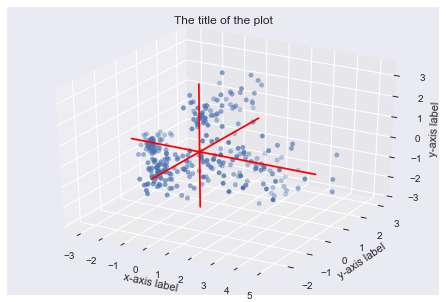

In [174]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = []
y = []
z = []
for item in results.Y:
 x.append(item[0])
 y.append(item[1])
 z.append(item[2])
%pylab inline
plt.close('all') # close all latent plotting windows
fig1 = plt.figure(facecolor='w') # Make a plotting figure
ax = Axes3D(fig1) # use the plotting figure to create a Axis3D object.
pltData = [x,y,z] 
ax.scatter(pltData[0], pltData[1], pltData[2], 'bo') # make a scatter plot of blue dots from the data
 
# make simple, bare axis lines through space:
xAxisLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) # 2 points make the x-axis line at the data extrema along x-axis 
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r') # make a red line for the x-axis.
yAxisLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) # 2 points make the y-axis line at the data extrema along y-axis
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r') # make a red line for the y-axis.
zAxisLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2]))) # 2 points make the z-axis line at the data extrema along z-axis
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r') # make a red line for the z-axis.
 
# label the axes 
#plt.rcParams['savefig.facecolor']='white'
figure(facecolor='white')
ax.set_xlabel("x-axis label") 
ax.set_ylabel("y-axis label")
ax.set_zlabel("y-axis label")
ax.set_title("The title of the plot")
plt.show() # show the plot

In [158]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
pca_score = pca.explained_variance_ratio_
V = pca.components_
pca_score

array([ 0.43452016,  0.19439708])

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda2\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


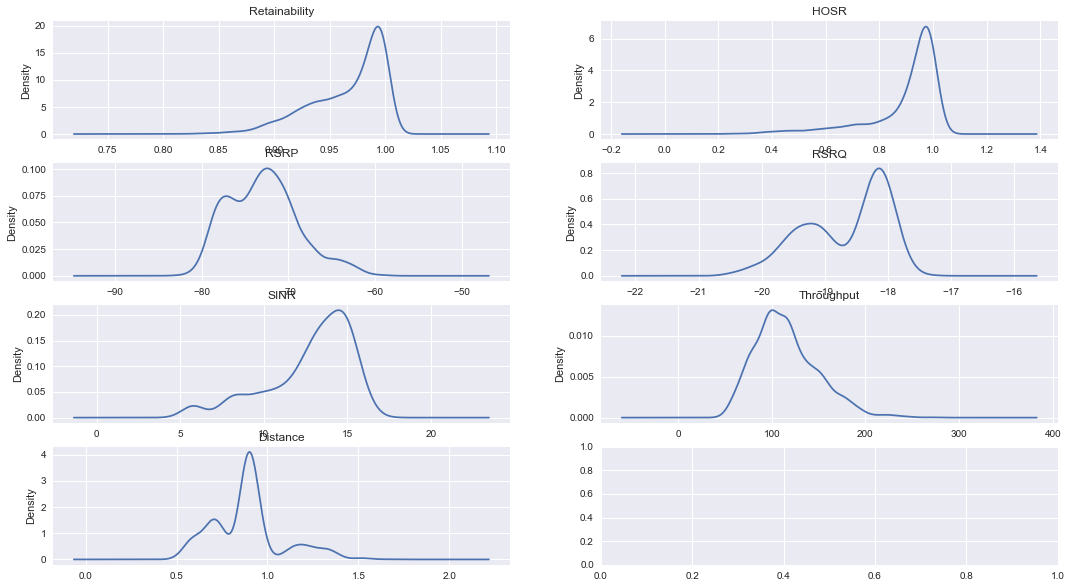

In [159]:
#train_df = df[0:550]
#df['Throughput'].plot.kde()
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 10)
fig, axes = plt.subplots(nrows=4, ncols=2)
base['Retainability'].plot.kde(ax=axes[0,0]); axes[0,0].set_title('Retainability')
base['HOSR'].plot.kde(ax=axes[0,1]); axes[0,1].set_title('HOSR')
base['RSRP'].plot.kde(ax=axes[1,0]); axes[1,0].set_title('RSRP')
base['RSRQ'].plot.kde(ax=axes[1,1]); axes[1,1].set_title('RSRQ')
base['SINR'].plot.kde(ax=axes[2,0]); axes[2,0].set_title('SINR')
base['Throughput'].plot.kde(ax=axes[2,1]); axes[2,1].set_title('Throughput')
base['Distance'].plot.kde(ax=axes[3,0]); axes[3,0].set_title('Distance')
#matplotlib.figure.Figure(figsize=(100,8))
plt.figure(figsize=(100,100))

In [160]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(sklearn.metrics.accuracy_score(y_test, pred))

0.987980769231


In [161]:
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = sklearn.model_selection.cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

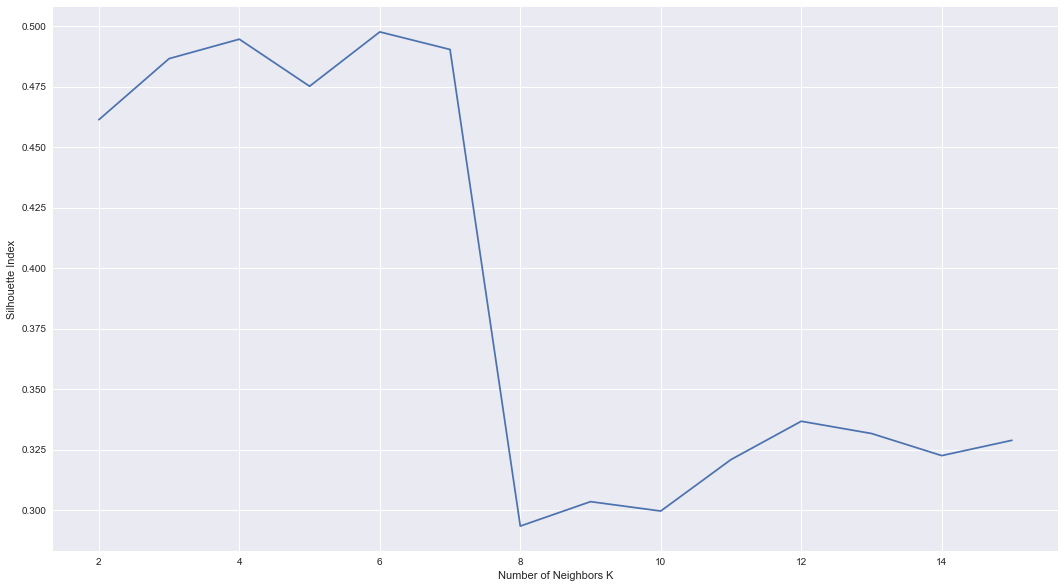

In [167]:
k = [15,14,13,12,11,10,9,8,7,6,5,4,3,2]
si = [0.328875,0.322554,0.331689,0.336746,0.320912,0.299656,0.303539,0.293442,0.49031,0.49757,0.475125,0.494563,0.486537,0.461298]
# plot misclassification error vs k
plt.plot(k, si)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Silhouette Index')
plt.show()

The optimal number of neighbors is 3


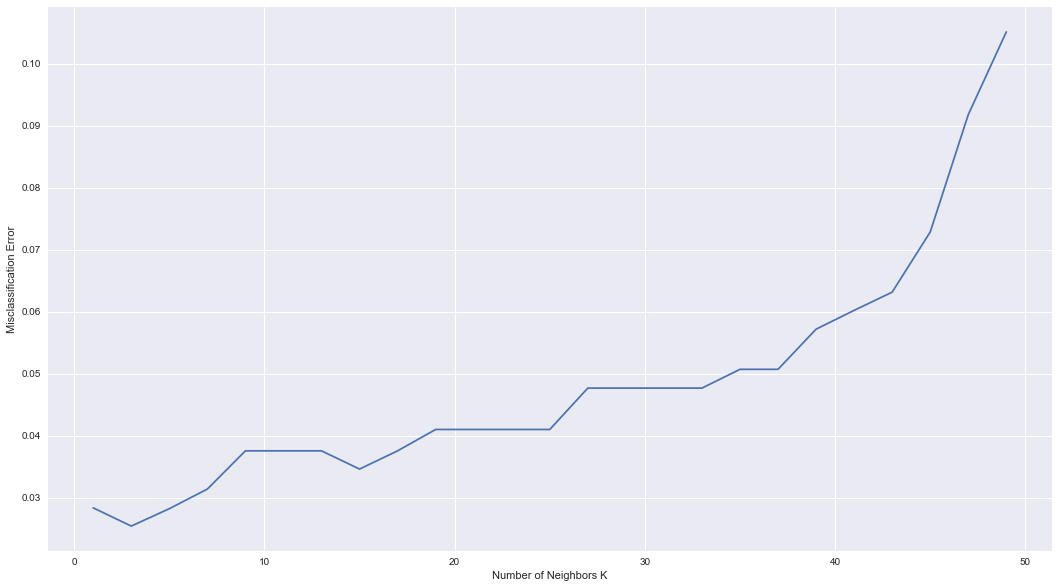

In [153]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [139]:
import neupy
lqv = neupy.algorithms.competitive.lvq.LVQ(n_inputs=7,n_classes=7,show_epoch=20,verbose=1)

AttributeError: module 'neupy' has no attribute 'algorithms'

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__']

In [162]:
# n_rows, n_columns = 100, 160
n_rows, n_columns = 10,10
#som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)#hexagonal#rectangular
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False,initialization="pca",gridtype='rectangular',neighborhood='bubble',verbose=0)
#%time som.train(dataset,epochs=1000, radius0=10, radiusN=2, radiuscooling='linear', scale0=0.1, scaleN=0.01, scalecooling='linear')
%time som.train(X_train,epochs=20000, radius0=10, radiusN=0, radiuscooling='linear', scale0=0.1, scaleN=0.01, scalecooling='linear')

Wall time: 1min 54s


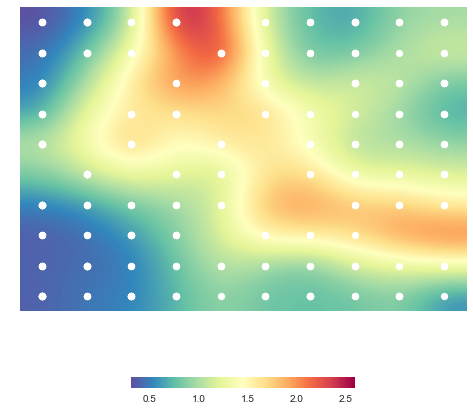

<module 'matplotlib.pyplot' from 'C:\\Anaconda2\\envs\\py36\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [165]:
som.view_umatrix(bestmatches=True,colorbar=1)

In [110]:
W = som.codebook.reshape((som.codebook.shape[0] * som.codebook.shape[1], som.codebook.shape[2]))

In [111]:
# generate the linkage matrix
Z = linkage(W, 'ward')

In [112]:
c, coph_dists = cophenet(Z, pdist(W))
c

0.69531160154827998

In [184]:
mapsize = [10,10]
som = sompy.SOMFactory.build(X_train, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='bubble', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info',train_rough_len=100, train_finetune_len=200,
              train_rough_radiusin=10,
              train_rough_radiusfin=1,
              train_finetune_radiusin=1,
              train_finetune_radiusfin=0)  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
C:\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
 pca_linear_initialization took: 0.066000 seconds
 Rough training...
 radius_ini: 10.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.130000, quantization error: 1.485190

 epoch: 2 ---> elapsed time:  0.105000, quantization error: 2.305540

 epoch: 3 ---> elapsed time:  0.102000, quantization error: 2.130457

 epoch: 4 ---> elapsed time:  0.111000, quantization error: 2.121706

 epoch: 5 ---> elapsed time:  0.106000, quantization error: 1.994734

 epoch: 6 ---> elapsed time:  0.114000, quantization error: 1.953551

 epoch: 7 ---> elapsed time:  0.103000, quantization err

In [189]:
som.calculate_topographic_error()

0.28938906752411575

In [ ]:
quantization_error = [0.625519]
quantization_error

In [181]:
dir(sompy.sompy.SOM)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_batchtrain',
 '_calculate_ms_and_mpd',
 'bmu_ind_to_xy',
 'build_component_names',
 'build_data_labels',
 'calculate_map_dist',
 'calculate_map_size',
 'calculate_topographic_error',
 'cluster',
 'component_names',
 'data_labels',
 'find_bmu',
 'find_k_nodes',
 'finetune_train',
 'node_activation',
 'predict',
 'predict_by',
 'predict_probability',
 'project_data',
 'rough_train',
 'train',
 'update_codebook_voronoi']

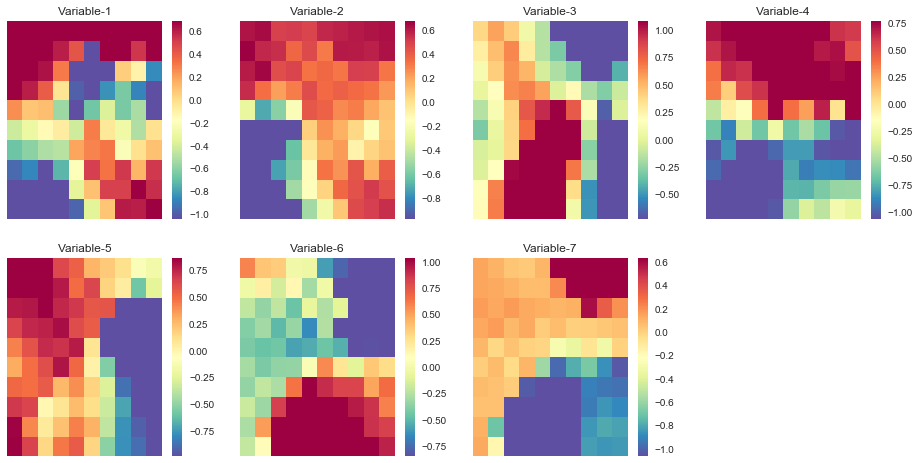

In [118]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(som, col_sz=4, which_dim="all", desnormalize=True)

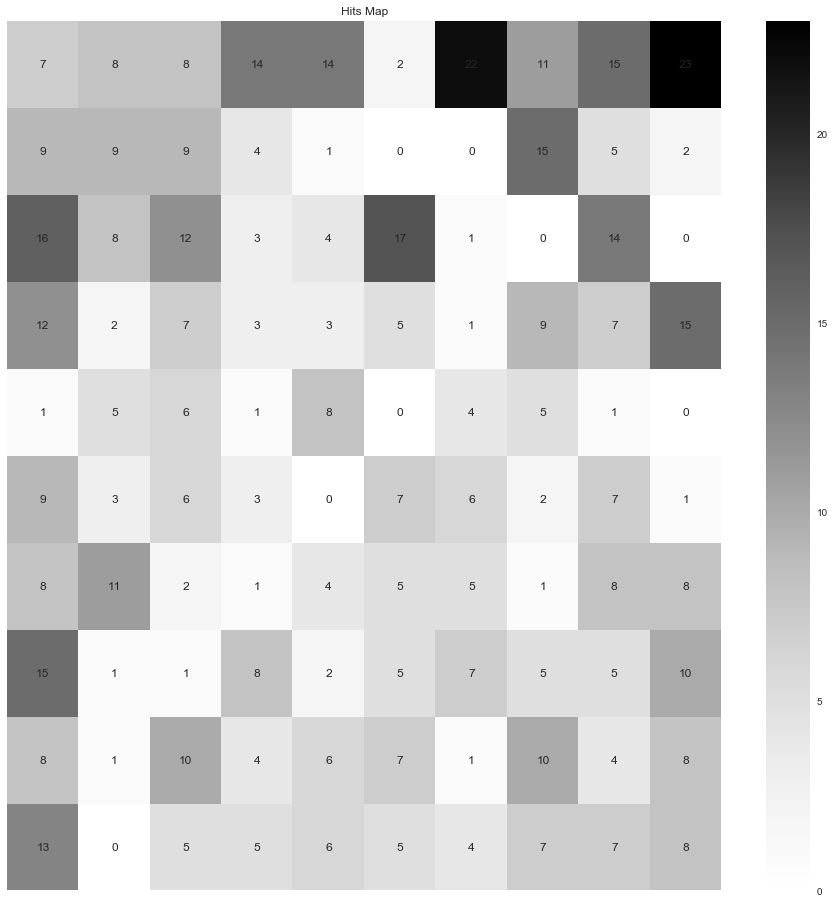

In [119]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(4,4,"Hits Map",text_size=12)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

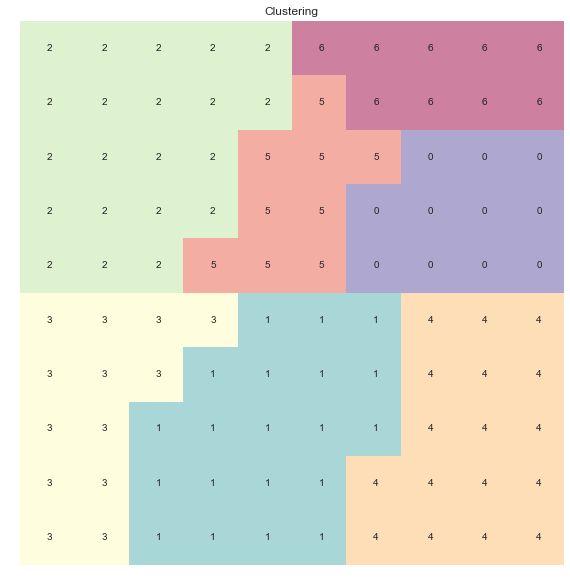

In [122]:
from sompy.visualization.hitmap import HitMapView
som.cluster(7)
hits  = HitMapView(10,10,"Clustering",text_size=12)
a=hits.show(som)

In [81]:
from sklearn.decomposition import PCA
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [83]:
print(pca.explained_variance_)

[ 2.91630919  1.38633201]


In [84]:
2.91630919/1.38633201

2.103615273227371

In [146]:
import theano

00001	#include <Python.h>
00002	#include "theano_mod_helper.h"
00003	#include "structmember.h"
00004	#include <sys/time.h>
00005	
00006	#if PY_VERSION_HEX >= 0x03000000
00007	#include "numpy/npy_3kcompat.h"
00008	#define PyCObject_AsVoidPtr  NpyCapsule_AsVoidPtr
00009	#define PyCObject_GetDesc  NpyCapsule_GetDesc
00010	#define PyCObject_Check NpyCapsule_Check
00011	#endif
00012	
00013	#ifndef Py_TYPE
00014	#define Py_TYPE(obj) obj->ob_type
00015	#endif
00016	
00017	/**
00018	
00019	TODO: 
00020	- Check max supported depth of recursion
00021	- CLazyLinker should add context information to errors caught during evaluation. Say what node we were on, add the traceback attached to the node.
00022	- Clear containers of fully-useed intermediate results if allow_gc is 1
00023	- Add timers for profiling
00024	- Add support for profiling space used.
00025	
00026	
00027	  */
00028	static double pytime(const struct timeval * tv)
00029	{
00030	  struct timeval t;
00031	  if (!tv)
00032	    {
00033	 

C:\Users\C00310~1\AppData\Local\Temp\ccOaeBsn.o: In function `_import_array':
C:/Anaconda2/envs/py36/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1455: undefined reference to `__imp_PyExc_ImportError'
C:/Anaconda2/envs/py36/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1461: undefined reference to `__imp_PyExc_AttributeError'
C:/Anaconda2/envs/py36/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1466: undefined reference to `__imp_PyCapsule_Type'
C:/Anaconda2/envs/py36/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1467: undefined reference to `__imp_PyExc_RuntimeError'
C:/Anaconda2/envs/py36/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1482: undefined reference to `__imp_PyExc_RuntimeError'
C:/Anaconda2/envs/py36/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1490: undefined reference to `__imp_PyExc_RuntimeError'
C:/Anaconda2/envs/py36/lib/site-packages/numpy/core/include/numpy/__multiarray_


00926	{
00927	    return PyBool_FromLong(self->allow_gc);
00928	}
00929	
00930	static int
00931	CLazyLinker_set_allow_gc(CLazyLinker *self, PyObject *value, void *closure)
00932	{
00933	  if(!PyBool_Check(value))
00934	    return -1;
00935	
00936	  if (value == Py_True)
00937	    self->allow_gc = true;
00938	  else
00939	    self->allow_gc = false;
00940	  return 0;
00941	}
00942	
00943	static PyGetSetDef CLazyLinker_getset[] = {
00944	  {(char*)"allow_gc",
00945	   (getter)CLazyLinker_get_allow_gc,
00946	   (setter)CLazyLinker_set_allow_gc,
00947	   (char*)"do this function support allow_gc",
00948	   NULL},
00949	  {NULL, NULL, NULL, NULL}  /* Sentinel */
00950	};
00951	static PyMemberDef CLazyLinker_members[] = {
00952	    {(char*)"nodes", T_OBJECT_EX, offsetof(CLazyLinker, nodes), 0,
00953	     (char*)"list of nodes"},
00954	    {(char*)"thunks", T_OBJECT_EX, offsetof(CLazyLinker, thunks), 0,
00955	     (char*)"list of thunks in program"},
00956	    {(char*)"call_counts", T_OBJECT

AttributeError: module 'theano' has no attribute 'gof'